In [69]:
import pandas as pd

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [70]:
import plotly.express as px

In [71]:
loan_app_df = pd.read_csv('dataset/loan_application.csv')

In [72]:
loan_app_df.head()

,application_id_current,target,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,type
0,100002,1.0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,6,7,4,3,1,8,6,5,2,0,5,0,1
1,100003,0.0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,4,1,1,1,3,1,39,2,0,0,0,1
2,100004,0.0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,6,7,4,3,1,8,1,11,4,3,7,2,1
3,100006,0.0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,6,7,4,0,1,8,6,5,4,3,7,2,1
4,100007,0.0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,6,7,4,3,1,3,4,37,4,3,7,2,1


In [73]:
loan_app_df['application_id_current'].unique().size

356255

In [74]:
loan_app_df \
    .fillna('-') \
    .groupby(['type', 'target']) \
    .agg({'application_id_current':'count'})

application_id_current
type target                        
0    -       48744                 
1    0.0     282686                
     1.0     24825

In [75]:
def screen_missing_values(df):
    
    df_col = df.columns.tolist()
    col_wo_missing_values = [col for col in df.columns.tolist() if df[col].count() == len(df)]
    
    return df[col_wo_missing_values]

In [76]:
def compare_two_dfs(df1, df2, key):
    df1_unique_key = df1[key].unique()
    df2_unique_key = df2[key].unique()
    
    print(f"num_of_{key} of the first: {df1_unique_key.size}")
    print(f"num_of_{key} of the second: {df2_unique_key.size}")
    
    print(f"num_of_intersections: {len(set(df1_unique_key).intersection(set(df2_unique_key)))}")

***
application_previous.csv
***

In [77]:
app_prev_df = pd.read_csv('dataset/application_previous.csv')

In [78]:
# Missing Values Screening
app_prev_df_wo_missing_values = screen_missing_values(app_prev_df)

In [79]:
app_prev_df_wo_missing_values.head()

,application_id_previous,application_id_current,amt_application,hour_appr_process_start,nflag_last_appl_in_day,days_decision,sellerplace_area,name_contract_type,weekday_appr_process_start,flag_last_appl_per_contract,name_cash_loan_purpose,name_contract_status,name_payment_type,code_reject_reason,name_type_suite,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,name_seller_industry,name_yield_group,product_combination
0,2030495,271877,17145.0,15,1,-73,35,1,2,1,23,0,0,7,7,2,19,3,0,4,2,4,13
1,2802425,108129,607500.0,11,1,-164,-1,0,4,1,24,0,3,7,6,2,27,2,2,3,10,2,7
2,2523466,122040,112500.0,11,1,-301,-1,0,5,1,24,0,0,7,5,2,27,2,2,5,10,1,6
3,2819243,176158,450000.0,7,1,-512,-1,0,1,1,24,0,0,7,7,2,27,2,2,5,10,4,8
4,1784265,202054,337500.0,9,1,-781,-1,0,4,1,20,2,0,1,7,2,27,2,1,5,10,1,3


In [80]:
app_prev_df_w_features = app_prev_df_wo_missing_values \
    .groupby(['application_id_current'], as_index=False) \
    .agg({
        'application_id_previous':'count',
        'amt_application':'sum',
    }) \
    .rename(columns={'application_id_previous':'prev_loan_cnt'})

In [81]:
compare_two_dfs(df1=loan_app_df, df2=app_prev_df_w_features, key='application_id_current')

num_of_application_id_current of the first: 356255
num_of_application_id_current of the second: 338857
num_of_intersections: 338857


***
DeFi_credits.csv
***

In [82]:
defi_credits_df = pd.read_csv('dataset/DeFi_credits.csv')

In [83]:
defi_credits_df.head()

,application_id_current,defi_id,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,days_credit_update,amt_annuity,credit_active,credit_currency,credit_type
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,-131,NaN,2,0,3
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,-20,NaN,0,0,4
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,-16,NaN,0,0,3
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,-16,NaN,0,0,4
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,-21,NaN,0,0,3


In [84]:
compare_two_dfs(df1=loan_app_df, df2=defi_credits_df, key='application_id_current')

num_of_application_id_current of the first: 356255
num_of_application_id_current of the second: 305811
num_of_intersections: 305811


In [85]:
# Missing Values Screening
defi_credits_df_wo_missing_values = screen_missing_values(defi_credits_df)

In [86]:
defi_credits_df_wo_missing_values.head()

,application_id_current,defi_id,days_credit,credit_day_overdue,cnt_credit_prolong,amt_credit_sum_overdue,days_credit_update,credit_active,credit_currency,credit_type
0,215354,5714462,-497,0,0,0.0,-131,2,0,3
1,215354,5714463,-208,0,0,0.0,-20,0,0,4
2,215354,5714464,-203,0,0,0.0,-16,0,0,3
3,215354,5714465,-203,0,0,0.0,-16,0,0,4
4,215354,5714466,-629,0,0,0.0,-21,0,0,3


In [87]:
for col in defi_credits_df_wo_missing_values.columns:
    col = defi_credits_df_wo_missing_values[col]

In [88]:
# 모든 대출 건에 대해 신용 기록이 있는지 확인
set(loan_app_df['application_id_current'].unique()) == set(defi_credits_df['application_id_current'].unique())

False

In [89]:
# 모든 대출 건에 대해 신용 기록이 있는지 확인
len(loan_app_df['application_id_current'].unique())

356255

In [90]:
len(defi_credits_df['application_id_current'].unique())

305811

In [91]:
# 모든 대출 건에 대해 신용 기록이 있는지 확인
len(loan_app_df['application_id_current'].unique()) - len(defi_credits_df['application_id_current'].unique())

50444

In [92]:
defi_credits_df_w_features = defi_credits_df_wo_missing_values \
    .groupby(['application_id_current'], as_index=False) \
    .agg({
        'defi_id':'count',
        'days_credit':'sum',
        'credit_day_overdue':'sum',
        'cnt_credit_prolong':'sum',
    }) \
    .rename(columns={'defi_id':'credit_cnt', 'days_credit':'sum_of_days_credit'})

***
DeFi_credits_balance.csv
***

In [93]:
defi_credits_balance_df = pd.read_csv('dataset/DeFi_credits_balance.csv')

In [94]:
defi_credits_balance_df.head()

,defi_id,months_balance,status
0,5715448,0,6
1,5715448,-1,6
2,5715448,-2,6
3,5715448,-3,6
4,5715448,-4,6


In [95]:
defi_credits_balance_df['months_balance'] = defi_credits_balance_df['months_balance'].apply(lambda x: abs(x))[:10]

In [96]:
defi_credits_df_w_merged = defi_credits_df \
    .merge(defi_credits_balance_df, on='defi_id', how='left') \

In [97]:
defi_credits_df_w_merged.head()

,application_id_current,defi_id,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,days_credit_update,amt_annuity,credit_active,credit_currency,credit_type,months_balance,status
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,-131,NaN,2,0,3,NaN,NaN
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,-20,NaN,0,0,4,NaN,NaN
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,-16,NaN,0,0,3,NaN,NaN
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,-16,NaN,0,0,4,NaN,NaN
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,-21,NaN,0,0,3,NaN,NaN


In [98]:
# 각 application_id_current에 대하여 잔고정보를 들고 있는 defi_id 정보를 충분히 가지고 있는지 확인해본다

In [99]:
compare_two_dfs(df1=defi_credits_df, df2=defi_credits_balance_df, key='defi_id')

num_of_defi_id of the first: 1716428
num_of_defi_id of the second: 817395
num_of_intersections: 774354


In [100]:
defi_credits_df['application_id_current'].unique().size

305811

In [101]:
defi_credits_df_w_merged.query("months_balance.isnull()", engine="python")['application_id_current'].unique().size

305811

In [102]:
print(defi_credits_df['defi_id'].unique().size, defi_credits_balance_df['defi_id'].unique().size)

1716428 817395


***
payments_history.csv
***

In [103]:
payments_history_df = pd.read_csv('dataset/payments_history.csv')

In [104]:
for col in payments_history_df.columns:
    print(col, payments_history_df[col].unique())

application_id_previous [1054186 1330831 2085231 ... 1984920 1946334 1276288]
application_id_current [161674 151639 193053 ... 413433 434445 405063]
num_instalment_version [  1.   0.   2.   4.   3.   5.   7.   8.   6.  13.   9.  21.  22.  12.
  17.  18.  11.  14.  34.  33.  19.  16.  15.  10.  26.  27.  20.  25.
  23.  24.  31.  32.  28.  35.  29.  30.  43.  39.  40.  36.  41.  42.
  37.  38.  68.  44.  45.  46. 178.  52.  51.  53.  54.  49.  50.  58.
  57.  55.  56.  48.  47.  72.  59.  73.  61.]
num_instalment_number [  6  34   1   3   2  12  11   4  14   8  20  56   7  23  38 116   5  46
 106   9 105  88  30  16  65  19  15  57  10  41  84  49  59 107  17  94
  64  28  24 140  43  99  69  13  22  85  29  83  73 139  39  18  26  25
  21  44  27  31  37  63  45  78  53  92 112  36  93 114  58  32  67  47
  68  40  81  61 117  60  75 149  35  48  82  79  71  51  72  80 156  42
  50 148  33  55 103  54 180  86 113  87  62 102 115 142 164 162 101  91
  96 100 104 121  66 123  52  89  70 

In [105]:
payments_history_df.head()

,application_id_previous,application_id_current,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [106]:
payments_history_df \
    .query("application_id_current == '161674'") \
    .sort_values(by=['application_id_previous', 'num_instalment_number'])

,application_id_previous,application_id_current,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment
577850,1054186,161674,1.0,1,-1330.0,-1338.0,6948.360,6948.360
47438,1054186,161674,1.0,2,-1300.0,-1307.0,6948.360,6948.360
425089,1054186,161674,1.0,3,-1270.0,-1275.0,6948.360,6948.360
3612113,1054186,161674,1.0,4,-1240.0,-1247.0,6948.360,6948.360
1878907,1054186,161674,1.0,5,-1210.0,-1217.0,6948.360,6948.360
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1128187,1054186,161674,1.0,7,-1150.0,-1175.0,6948.360,6948.360
138614,1054186,161674,1.0,8,-1120.0,-1175.0,6948.360,6948.360
1608829,1054186,161674,1.0,9,-1090.0,-1154.0,6948.360,6948.360
1038640,1054186,161674,1.0,10,-1060.0,-1125.0,6948.360,6948.360


In [107]:
payments_history_df[['application_id_previous', 'num_instalment_version', 'amt_instalment', 'amt_payment']] \
    .drop_duplicates() \
    .groupby(['application_id_previous', 'num_instalment_version'], as_index=False) \
    .agg({'amt_instalment':'count'}) \
    .query("amt_instalment > 1") \
    .head()

,application_id_previous,num_instalment_version,amt_instalment
7,1000005,1.0,4
11,1000009,1.0,2
14,1000011,1.0,2
15,1000012,1.0,2
16,1000013,1.0,2


In [108]:
payments_history_df.query("application_id_previous == '1000005'").sort_values(by="num_instalment_number")

,application_id_previous,application_id_current,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment
1310691,1000005,176456,1.0,1,-1688.0,-1687.0,14713.605,14713.605
109820,1000005,176456,1.0,2,-1658.0,-1664.0,14713.605,14713.605
2255181,1000005,176456,1.0,3,-1628.0,-1636.0,14713.605,14713.605
2170925,1000005,176456,1.0,4,-1598.0,-1606.0,14713.605,14713.605
2612194,1000005,176456,1.0,5,-1568.0,-1575.0,14713.605,14713.605
3503786,1000005,176456,1.0,6,-1538.0,-1545.0,14713.605,14713.605
2892901,1000005,176456,1.0,7,-1508.0,-1512.0,14713.605,14713.605
632811,1000005,176456,1.0,8,-1478.0,-1484.0,14713.605,14713.605
1740975,1000005,176456,1.0,9,-1448.0,-1445.0,14713.605,14710.815
2618814,1000005,176456,1.0,9,-1448.0,-1484.0,14713.605,2.790


In [109]:
payments_history_df \
    .query("application_id_current == '161674'") \
    .sort_values(by=['application_id_previous', 'num_instalment_number'])

,application_id_previous,application_id_current,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment
577850,1054186,161674,1.0,1,-1330.0,-1338.0,6948.360,6948.360
47438,1054186,161674,1.0,2,-1300.0,-1307.0,6948.360,6948.360
425089,1054186,161674,1.0,3,-1270.0,-1275.0,6948.360,6948.360
3612113,1054186,161674,1.0,4,-1240.0,-1247.0,6948.360,6948.360
1878907,1054186,161674,1.0,5,-1210.0,-1217.0,6948.360,6948.360
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1128187,1054186,161674,1.0,7,-1150.0,-1175.0,6948.360,6948.360
138614,1054186,161674,1.0,8,-1120.0,-1175.0,6948.360,6948.360
1608829,1054186,161674,1.0,9,-1090.0,-1154.0,6948.360,6948.360
1038640,1054186,161674,1.0,10,-1060.0,-1125.0,6948.360,6948.360


In [110]:
payments_history_df.groupby(['application_id_previous'], as_index=False).agg({'application_id_current':'count'}).head()

,application_id_previous,application_id_current
0,1000001,2
1,1000002,4
2,1000003,3
3,1000004,7
4,1000005,11


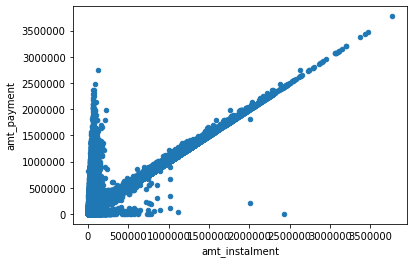

In [111]:
payments_history_df.plot.scatter(x='amt_instalment', y='amt_payment')

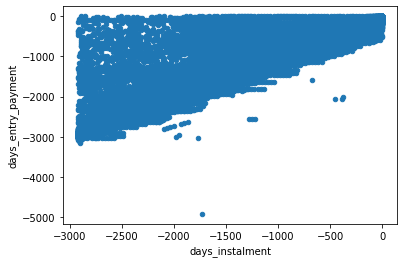

In [112]:
payments_history_df.plot.scatter(x='days_instalment', y='days_entry_payment')

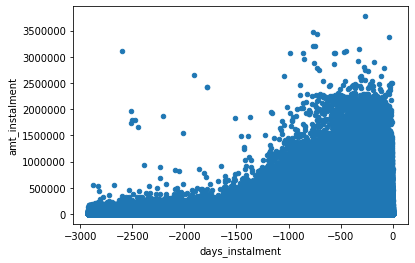

In [113]:
payments_history_df.plot.scatter(x='days_instalment', y='amt_instalment')

In [114]:
payments_history_df \
    .query("days_entry_payment >= days_instalment") \
    .count()

application_id_previous    4293019
application_id_current     4293019
num_instalment_version     4293019
num_instalment_number      4293019
days_instalment            4293019
days_entry_payment         4293019
amt_instalment             4293019
amt_payment                4293019
dtype: int64

In [115]:
payments_history_df \
    .query("days_entry_payment < days_instalment") \
    .count()

application_id_previous    9309477
application_id_current     9309477
num_instalment_version     9309477
num_instalment_number      9309477
days_instalment            9309477
days_entry_payment         9309477
amt_instalment             9309477
amt_payment                9309477
dtype: int64

In [116]:
compare_two_dfs(df1=loan_app_df, df2=app_prev_df, key='application_id_current')

num_of_application_id_current of the first: 356255
num_of_application_id_current of the second: 338857
num_of_intersections: 338857


In [117]:
payments_history_df \
    .groupby(['application_id_current'], as_index=False) \
    .agg({'application_id_previous':'nunique'}) \
    .head()

,application_id_current,application_id_previous
0,100001,2
1,100002,1
2,100003,3
3,100004,1
4,100005,1


In [118]:
payments_history_df_agg = payments_history_df \
    .groupby(['application_id_current', 'application_id_previous'], as_index=False) \
    .agg({
        'amt_instalment':'sum', 
        'amt_payment':'sum', 
        'num_instalment_number':'count',
    })

In [119]:
payments_history_df_agg['appliation_w_non_payment'] = payments_history_df_agg.apply(lambda x: 1 if x['amt_instalment'] > x['amt_payment'] else 0, axis=1)[:100]

In [120]:
payments_history_df_w_features = payments_history_df_agg \
    .groupby(['application_id_current'], as_index=False) \
    .agg({
        'application_id_previous':'count',
        'amt_instalment':'sum',
        'amt_payment':'sum',
        'num_instalment_number':'sum',
        'appliation_w_non_payment':'sum',
    }) \
    .rename(columns={'application_id_previous':'prev_app_cnt'})

***
aave_loan_balance.csv
***

In [121]:
aave_loan_balance_df = pd.read_csv('dataset/aave_loan_balance.csv')

In [122]:
aave_loan_balance_df.head()

,application_id_previous,application_id_current,months_balance,amt_balance,amt_credit_limit_actual,amt_drawings_atm_current,amt_drawings_current,amt_drawings_other_current,amt_drawings_pos_current,amt_inst_min_regularity,amt_payment_current,amt_payment_total_current,amt_receivable_principal,amt_recivable,amt_total_receivable,cnt_drawings_atm_current,cnt_drawings_current,cnt_drawings_other_current,cnt_drawings_pos_current,cnt_instalment_mature_cum,sk_dpd,sk_dpd_def,name_contract_status
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,0,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,0,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,0,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,0,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,0,0,0


In [123]:
aave_loan_balance_df_wo_missing_values = screen_missing_values(aave_loan_balance_df)

In [124]:
aave_loan_balance_df_wo_missing_values.head()

,application_id_previous,application_id_current,months_balance,amt_balance,amt_credit_limit_actual,amt_drawings_current,amt_payment_total_current,amt_receivable_principal,amt_recivable,amt_total_receivable,cnt_drawings_current,sk_dpd,sk_dpd_def,name_contract_status
0,2562384,378907,-6,56.970,135000,877.5,1800.0,0.000,0.000,0.000,1,0,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,60175.080,64875.555,64875.555,1,0,0,0
2,1740877,371185,-7,31815.225,450000,0.0,2250.0,26926.425,31460.085,31460.085,0,0,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,11925.0,224949.285,233048.970,233048.970,1,0,0,0
4,1891521,126868,-1,453919.455,450000,11547.0,27000.0,443044.395,453919.455,453919.455,1,0,0,0


In [125]:
aave_loan_balance_df_wo_missing_values \
    .groupby(['application_id_current'], as_index=False) \
    .agg({'application_id_previous':'count'}) \
    .query("application_id_previous > 1") \
    .head()

,application_id_current,application_id_previous
0,100006,6
1,100011,74
2,100013,96
3,100021,17
4,100023,8


In [126]:
compare_two_dfs(df1=loan_app_df, df2=aave_loan_balance_df, key='application_id_current')

num_of_application_id_current of the first: 356255
num_of_application_id_current of the second: 103558
num_of_intersections: 103558


In [127]:
compare_two_dfs(df1=loan_app_df, df2=app_prev_df, key='application_id_current')

num_of_application_id_current of the first: 356255
num_of_application_id_current of the second: 338857
num_of_intersections: 338857


In [131]:
compare_two_dfs(df1=aave_loan_balance_df, df2=app_prev_df, key='application_id_previous')

num_of_application_id_previous of the first: 104307
num_of_application_id_previous of the second: 1670214
num_of_intersections: 92935


In [132]:
aave_loan_balance_df_w_faetures = aave_loan_balance_df \
    .groupby(['application_id_current'], as_index=False) \
    .agg({'application_id_previous':'count'}) \
    .rename(columns={'application_id_previous':'aave_cnt'})

## DATA EXPORT

In [134]:
tot_df = loan_app_df[['application_id_current', 'target', 'type']] \
    .merge(app_prev_df_w_features, on='application_id_current', how='left') \
    .merge(defi_credits_df_w_features, on='application_id_current', how='left') \
    .merge(payments_history_df_w_features, on='application_id_current', how='left') \
    .merge(aave_loan_balance_df_w_faetures, on='application_id_current', how='left') \
    .fillna(0)

In [135]:
len(loan_app_df) == len(tot_df)

True

In [136]:
tot_df.head()

,application_id_current,target,type,prev_loan_cnt,amt_application,credit_cnt,sum_of_days_credit,credit_day_overdue,cnt_credit_prolong,prev_app_cnt,amt_instalment,amt_payment,num_instalment_number,appliation_w_non_payment,aave_cnt
0,100002,1.0,1,1.0,179055.00,8.0,-6992.0,0.0,0.0,1.0,219625.695,219625.695,19.0,0.0,0.0
1,100003,0.0,1,3.0,1306309.50,4.0,-5603.0,0.0,0.0,3.0,1618864.650,1618864.650,25.0,0.0,0.0
2,100004,0.0,1,1.0,24282.00,2.0,-1734.0,0.0,0.0,1.0,21288.465,21288.465,3.0,0.0,0.0
3,100006,0.0,1,9.0,2449829.34,0.0,0.0,0.0,0.0,3.0,1007153.415,1007153.415,16.0,0.0,6.0
4,100007,0.0,1,6.0,903181.50,1.0,-1149.0,0.0,0.0,5.0,835985.340,806127.975,66.0,2.0,0.0


In [142]:
train_df = tot_df.query("type == 1").drop("type", axis=1)
test_df = tot_df.query("type == 0").drop("type", axis=1)

In [143]:
train_df.to_csv("Train.csv", index=False)
test_df.to_csv("Test.csv", index=False)